## Скачаем датасет

In [1]:
!wget https://lms.skillfactory.ru/assets/courseware/v1/425d6864db937e4ebabc972e581769ab/asset-v1:Skillfactory+DST-12+11MAR2020+type@asset+block/stud_math.csv

--2020-06-25 21:08:40--  https://lms.skillfactory.ru/assets/courseware/v1/425d6864db937e4ebabc972e581769ab/asset-v1:Skillfactory+DST-12+11MAR2020+type@asset+block/stud_math.csv
Resolving lms.skillfactory.ru (lms.skillfactory.ru)... 84.201.175.12
Connecting to lms.skillfactory.ru (lms.skillfactory.ru)|84.201.175.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47309 (46K) [application/vnd.ms-excel]
Saving to: ‘stud_math.csv’

stud_math.csv       100%[===================>]  46.20K  --.-KB/s    in 0.1s    

2020-06-25 21:08:40 (370 KB/s) - ‘stud_math.csv’ saved [47309/47309]



## Ипортируем библиотеки

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Загружаем датасет в память

In [168]:
df = pd.read_csv("./stud_math.csv")
display(df.shape)
df.head()

(395, 30)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


## Переименум колонки

In [169]:
rename_dict = {
    "address": "address_type",
    "famsize": "family_size",
    "Pstatus": "parent_status",
    "Medu": "mother_edu",
    "Fedu": "father_edu",
    "Mjob": "mother_job",
    "Fjob": "father_job",
    "reason": "school_select_reason",
    "traveltime": "travel_time",
    "studytime, granular": "study_time",
    "schoolsup": "school_support",
    "famsup": "family_support",
    "paid": "math_paid_lessons",
    "higher": "wants_high_degree",
    "famrel": "family_relationships",
    "freetime": "free_time",
    "goout": "friends_time",
    "studytime, granular": "granular"
}

df = df.rename(rename_dict, axis="columns")

Колонка `granular` не упоминается в задании, но я пока ее оставлю

Посмотрим что с основной колонкой `score`: если ли пропуски, выбросы и т.д.

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

,school,sex,age,address_type,family_size,parent_status,mother_edu,father_edu,mother_job,father_job,...,granular,wants_high_degree,internet,romantic,family_relationships,free_time,friends_time,health,absences,score
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,...,-6.0,yes,no,no,4.0,NaN,3.0,4.0,6.0,NaN
244,GP,F,18,U,GT3,T,2.0,1.0,other,other,...,-9.0,yes,yes,yes,4.0,4.0,4.0,3.0,0.0,NaN
270,GP,F,19,NaN,GT3,T,3.0,3.0,other,services,...,-6.0,yes,yes,no,4.0,3.0,5.0,5.0,NaN,NaN
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,...,-6.0,yes,yes,no,5.0,NaN,4.0,4.0,4.0,NaN
312,GP,M,19,U,GT3,T,1.0,2.0,other,services,...,-6.0,yes,yes,no,4.0,5.0,NaN,4.0,3.0,NaN
350,MS,M,19,NaN,GT3,T,1.0,1.0,other,services,...,-6.0,yes,yes,no,5.0,4.0,4.0,2.0,8.0,NaN


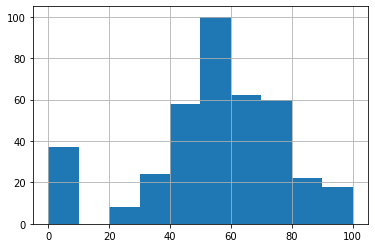

In [173]:
display(df['score'].describe())
display(df[df['score'].isnull()]) # Пустые значения
df['score'].hist()

Выбросы не обнаружены, но есть пустые значения. Такие строки нам не нужны, так как не на что будет ореентироваться. Удаляем.

In [174]:
df = df[~df['score'].isnull()]

## Посмотрим типы данных в колонках

In [175]:
df.dtypes

school                   object
sex                      object
age                       int64
address_type             object
family_size              object
parent_status            object
mother_edu              float64
father_edu              float64
mother_job               object
father_job               object
school_select_reason     object
guardian                 object
travel_time             float64
studytime               float64
failures                float64
school_support           object
family_support           object
math_paid_lessons        object
activities               object
nursery                  object
granular                float64
wants_high_degree        object
internet                 object
romantic                 object
family_relationships    float64
free_time               float64
friends_time            float64
health                  float64
absences                float64
score                   float64
dtype: object

## Получим списки числовых и строковых колонок

In [176]:
columns = df.columns.to_series()

num_columns = df.select_dtypes(include=(np.int64, np.float64)).columns
str_columns = df.select_dtypes(include=np.object).columns

display(num_columns)
display(str_columns)

Index(['age', 'mother_edu', 'father_edu', 'travel_time', 'studytime',
       'failures', 'granular', 'family_relationships', 'free_time',
       'friends_time', 'health', 'absences', 'score'],
      dtype='object')

Index(['school', 'sex', 'address_type', 'family_size', 'parent_status',
       'mother_job', 'father_job', 'school_select_reason', 'guardian',
       'school_support', 'family_support', 'math_paid_lessons', 'activities',
       'nursery', 'wants_high_degree', 'internet', 'romantic'],
      dtype='object')

## Посмотрим частотность значение для стоковых колонок

In [177]:
for col in str_columns:
    print(col)
    display(df[col].value_counts())
    print('====')

school


GP    344
MS     45
Name: school, dtype: int64

====
sex


F    204
M    185
Name: sex, dtype: int64

====
address_type


U    291
R     83
Name: address_type, dtype: int64

====
family_size


GT3    255
LE3    107
Name: family_size, dtype: int64

====
parent_status


T    308
A     36
Name: parent_status, dtype: int64

====
mother_job


other       127
services     98
at_home      58
teacher      55
health       32
Name: mother_job, dtype: int64

====
father_job


other       194
services     99
teacher      29
at_home      16
health       15
Name: father_job, dtype: int64

====
school_select_reason


course        135
reputation    102
home          101
other          34
Name: school_select_reason, dtype: int64

====
guardian


mother    248
father     86
other      24
Name: guardian, dtype: int64

====
school_support


no     331
yes     49
Name: school_support, dtype: int64

====
family_support


yes    216
no     135
Name: family_support, dtype: int64

====
math_paid_lessons


no     197
yes    153
Name: math_paid_lessons, dtype: int64

====
activities


yes    192
no     183
Name: activities, dtype: int64

====
nursery


yes    297
no      77
Name: nursery, dtype: int64

====
wants_high_degree


yes    350
no      19
Name: wants_high_degree, dtype: int64

====
internet


yes    300
no      55
Name: internet, dtype: int64

====
romantic


no     235
yes    123
Name: romantic, dtype: int64

====


Все значание соответствуют описанию. Все в порядке.

## Посмотрим частотность значений для числовых колонок

In [178]:
for col in num_columns:
    print(col)
    display(df[col].value_counts())
    print('====')

age


16    103
17     98
15     82
18     80
19     21
20      3
22      1
21      1
Name: age, dtype: int64

====
mother_edu


4.0    131
2.0    100
3.0     96
1.0     56
0.0      3
Name: mother_edu, dtype: int64

====
father_edu


2.0     105
3.0      94
4.0      88
1.0      75
0.0       2
40.0      1
Name: father_edu, dtype: int64

====
travel_time


1.0    239
2.0     94
3.0     21
4.0      7
Name: travel_time, dtype: int64

====
studytime


2.0    189
1.0    103
3.0     63
4.0     27
Name: studytime, dtype: int64

====
failures


0.0    290
1.0     48
2.0     15
3.0     14
Name: failures, dtype: int64

====
granular


-6.0     189
-3.0     103
-9.0      63
-12.0     27
Name: granular, dtype: int64

====
family_relationships


 4.0    178
 5.0     97
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: family_relationships, dtype: int64

====
free_time


3.0    152
4.0    110
2.0     63
5.0     37
1.0     18
Name: free_time, dtype: int64

====
friends_time


3.0    126
2.0    101
4.0     81
5.0     51
1.0     23
Name: friends_time, dtype: int64

====
health


5.0    137
3.0     88
4.0     60
1.0     47
2.0     42
Name: health, dtype: int64

====
absences


0.0      110
2.0       60
4.0       52
6.0       30
8.0       20
10.0      17
12.0      12
14.0      12
3.0        7
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

====
score


50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

====


Для колонки age моможно было бы считать выбросами значения 21 и 22, но по описанию датасета эти значения входят в диапазон допустимых. Идем дальше.

- `father_edu` значение 40 скорее всего должно быть 4. 

In [179]:
df.loc[df['father_edu'] == 40, 'father_edu'] = 4

- `granular` похоже без выбросов, "на глаз", что бы эта колонка не значила. 
- `family_relationships` -1 скорее всего ошибка, но какого рода не известно, лучше перезаписать на np.NaN

In [180]:
df.loc[df['family_relationships'] == -1, 'family_relationships'] = np.NaN

- `absences` явно присутствуют выбросы. Присмотримся

In [181]:
# Объявим вспомогательные функции

def get_outliers_range(series):
    "Принимает на вход объект pd.Series и возвращает границы для выбросов"
    q25 = series.quantile(0.25)
    q75 = series.quantile(0.75)
    iqr = q75 - q25
    x_min = q25 - (iqr * 1.5)
    x_max = q75 + (iqr * 1.5)  
    
    return x_min, x_max

def get_outliers(series):
    "Принимает на вход объект pd.Series и возвращает pd.Series содержащую только выбросы"
    x_min, x_max = get_outliers_range(series)
    return series[(series < x_min) | (series > x_max)]

def without_outliers(series):
    "Принимает на вход объект pd.Series и возвращает pd.Series не содержащую выбросы"
    x_min, x_max = get_outliers_range(series)
    return series[(series >= x_min) & (series <= x_max)]

def clear_outliers(series):
    "Принимает на вход объект pd.Series и заменяет в ней выбросы на np.NaN"    
    x_min, x_max = get_outliers_range(series)
    series[(series < x_min) | (series > x_max)] = np.NaN

40      25.0
74      54.0
103     26.0
183     56.0
198     24.0
205     28.0
216     22.0
222    385.0
260     21.0
276     75.0
277     22.0
280     30.0
307     38.0
313     22.0
315     40.0
320     23.0
390    212.0
Name: absences, dtype: float64

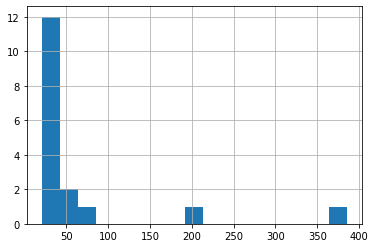

In [182]:
absences_outlier = get_outliers(df["absences"])
display(absences_outlier)
absences_outlier.hist(bins=absences_outlier.shape[0])

Очень интересно. Числа вроде 22 вполне могут быть реальными. Даже 212 может быть реальным кол-вом пропусков. 
Попробуем посмотреть на коррелящию пропусков и итоговой оценки. 

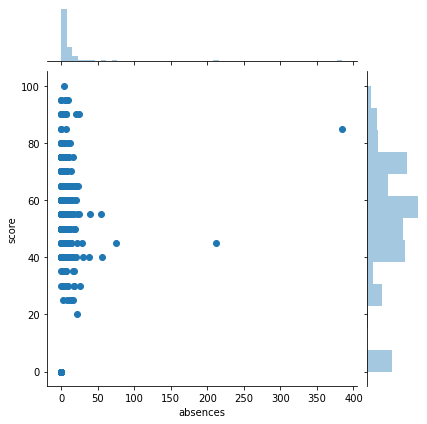

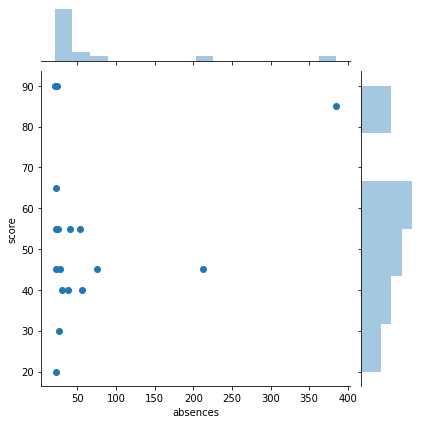

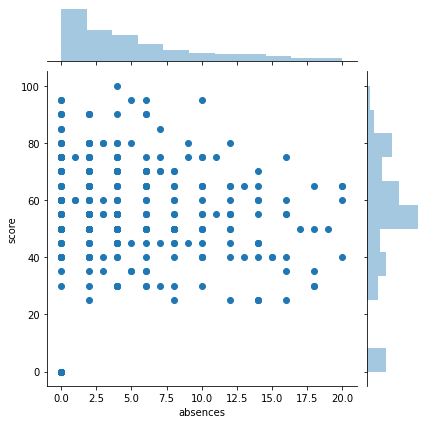

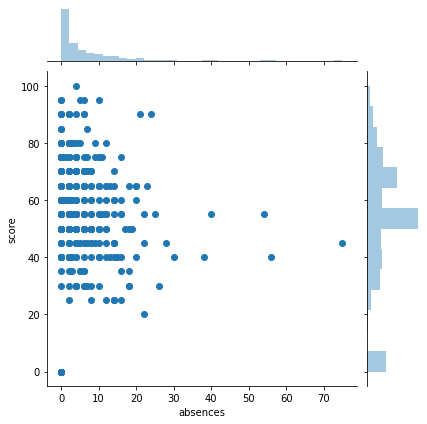

In [183]:
original = df[:] # Оригинальный датасет
outliers = df[df['absences'].isin(absences_outlier)] # только выбросы по absences
clear = df[~df['absences'].isin(absences_outlier)] # без выбросов по absences
manual = df[df['absences'] < 200] # ручная фильрация по absences

for x in [original, outliers, clear, manual]:
    sns.jointplot(x['absences'], x['score'])

In [184]:
for x in [original, outliers, clear, manual]:
    display(x.loc[:, ['absences', 'score']].corr())

,absences,score
absences,1.000000,0.065283
score,0.065283,1.000000


,absences,score
absences,1.000000,0.299703
score,0.299703,1.000000


,absences,score
absences,1.000000,0.081274
score,0.081274,1.000000


,absences,score
absences,1.000000,0.031698
score,0.031698,1.000000


Судя по графикам и тамблицам корреляции, кол-во пропусков не оказывают значительного влиания на оценку, по этому черезчур большие значение надо обрабатывать как ошибку. Оставим все как есть.

- `score` оценка 0 у 37 человек. Печально.

## Посмотрим корреляции между числовыми колонками

In [206]:
corr = df.corr()
corr[(0.1 < corr) & (1 > corr)]

,age,mother_edu,father_edu,travel_time,studytime,failures,granular,family_relationships,free_time,friends_time,health,absences,score
age,NaN,NaN,NaN,NaN,NaN,0.205919,NaN,NaN,NaN,0.121115,NaN,NaN,NaN
mother_edu,NaN,NaN,0.621981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.213349
father_edu,NaN,0.621981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.130923
travel_time,NaN,NaN,NaN,NaN,NaN,NaN,0.105910,NaN,NaN,NaN,NaN,NaN,NaN
studytime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.115741
failures,0.205919,NaN,NaN,NaN,NaN,NaN,0.181947,NaN,NaN,0.107747,NaN,NaN,NaN
granular,NaN,NaN,NaN,0.10591,NaN,0.181947,NaN,NaN,0.125066,NaN,NaN,NaN,NaN
family_relationships,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.162715,NaN,0.100807,NaN,NaN
free_time,NaN,NaN,NaN,NaN,NaN,NaN,0.125066,0.162715,NaN,0.296338,NaN,NaN,NaN
friends_time,0.121115,NaN,NaN,NaN,NaN,0.107747,NaN,NaN,0.296338,NaN,NaN,NaN,NaN


Видим что наиболее скоррелированными являются образования отца и матери. Однако образование матери больше клияет на оченку, поэтому оставим обе колонки.

## Проведем анализ номинативных переменных

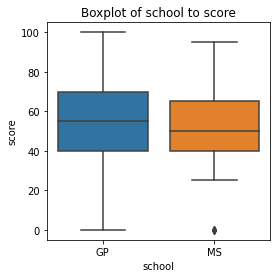

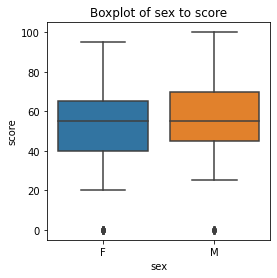

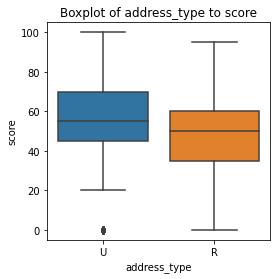

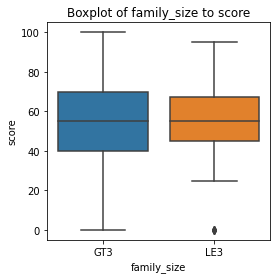

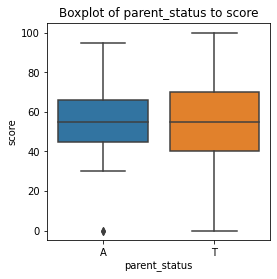

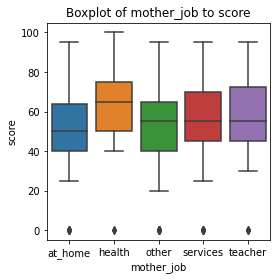

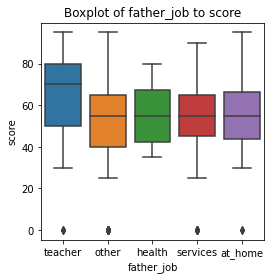

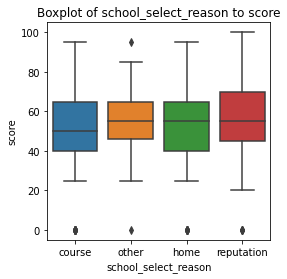

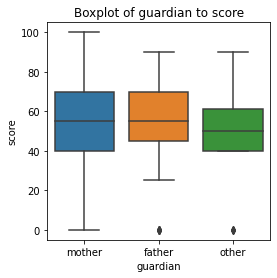

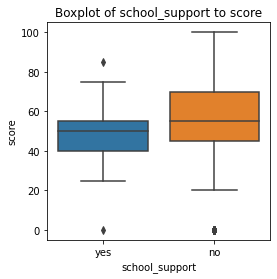

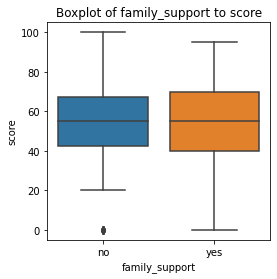

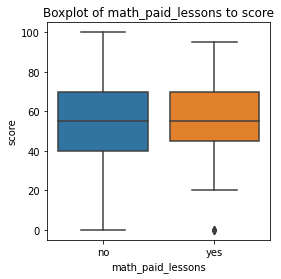

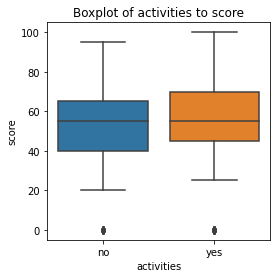

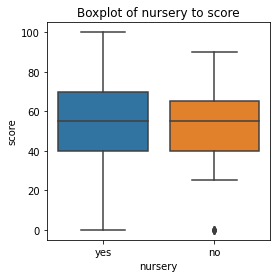

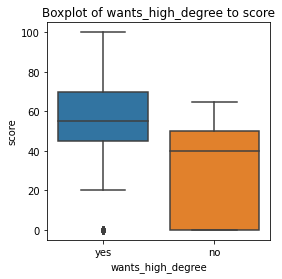

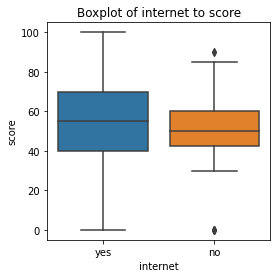

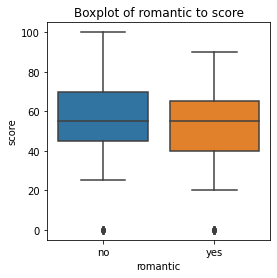

In [212]:
# Для строковых колонок
for col in str_columns:
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.boxplot(x=col, y='score', data=df, ax=ax)
    ax.set_title(f"Boxplot of {col} to score")

    plt.show()

Похоже что размер семьи, статус родителей и поддержка родителей не оказывают значительного влияния на итоговую оценку

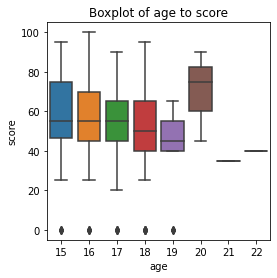

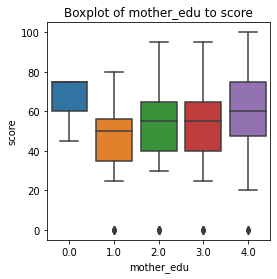

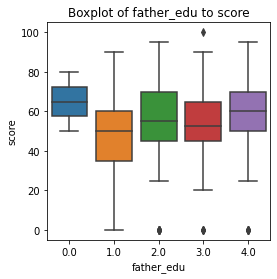

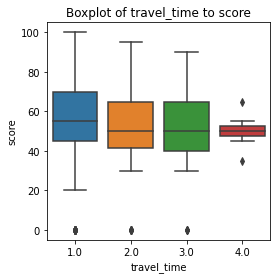

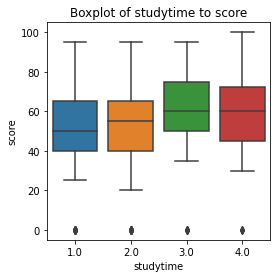

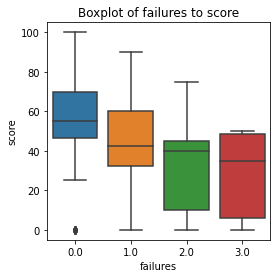

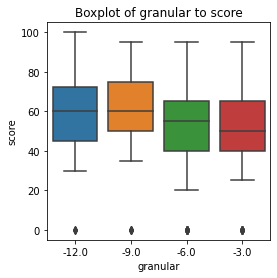

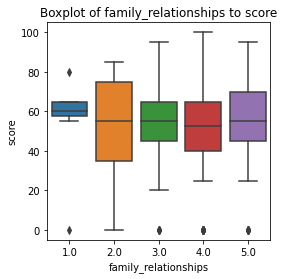

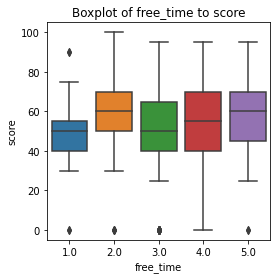

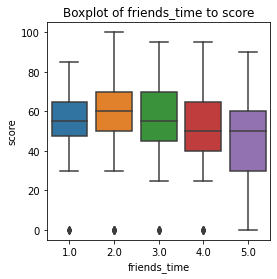

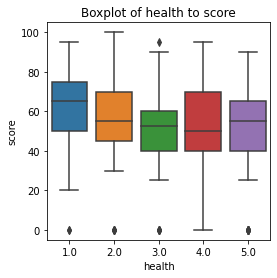

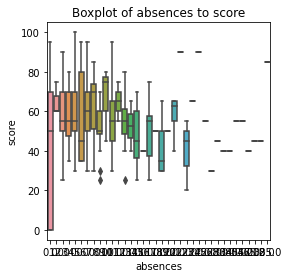

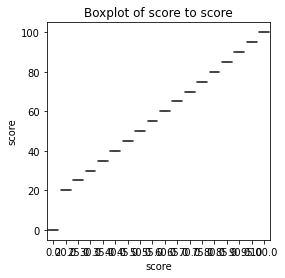

In [213]:
# Для числовых колонок
for col in num_columns:
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.boxplot(x=col, y='score', data=df, ax=ax)
    ax.set_title(f"Boxplot of {col} to score")

    plt.show()

Здесь все значение вроде как можно испольщовать для прогрнозирования оценок

## Попробуем тест Стьюдента для всех колонок

In [215]:
from itertools import combinations
from scipy.stats import ttest_ind

for col in df.columns:
    if col == 'score':
        continue
    
    unique_values = df[col].unique()
    comb_list = list(combinations(unique_values, 2))
    
    for a, b in comb_list:
        a_values = df.loc[df[col] == a, 'score']
        b_values = df.loc[df[col] == b, 'score']        
        
        pval = ttest_ind(a_values, b_values).pvalue
        
        if pval <= (0.05 / len(comb_list)):
            print(f"Найдены статистически значимые различия для колонки {col}")
            break

/Users/altera/test/skillfactory_datascience/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/altera/test/skillfactory_datascience/venv/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Найдены статистически значимые различия для колонки mother_edu
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки wants_high_degree
Найдены статистически значимые различия для колонки romantic


Вот мы и нашли статистически значемые колонки. Оставим в датасете только их

In [216]:
result = df.loc[:, ['score', 'mother_edu', 'failures', 'wants_high_degree', 'romantic']]

In [217]:
result

,score,mother_edu,failures,wants_high_degree,romantic
0,30.0,4.0,0.0,yes,no
1,30.0,1.0,0.0,yes,no
2,50.0,1.0,3.0,yes,NaN
3,75.0,4.0,0.0,yes,yes
4,50.0,3.0,0.0,yes,no
...,...,...,...,...,...
390,45.0,2.0,2.0,yes,no
391,80.0,3.0,0.0,yes,no
392,35.0,1.0,3.0,NaN,no
393,50.0,3.0,0.0,yes,no
